Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap
diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression. Setelah itu, buatlah slide presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
#Showing Python version
from platform import python_version
print(python_version())

3.9.12


In [3]:
#Display all query result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 999

# Load Dataset

In [4]:
df = pd.read_csv('application_train.csv')
df_ori = pd.read_csv('application_train.csv')

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,307501,307502,307503,307504,307505,307506,307507,307508,307509,307510
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012,...,456245,456246,456247,456248,456249,456251,456252,456253,456254,456255
TARGET,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M,...,F,F,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y,Y,Y,Y,Y,Y,...,Y,Y,Y,Y,Y,N,Y,Y,Y,N
CNT_CHILDREN,0,0,0,0,0,0,1,0,0,0,...,3,1,0,0,0,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0,99000.0,171000.0,360000.0,112500.0,135000.0,...,81000.0,94500.0,112500.0,153000.0,112500.0,157500.0,72000.0,153000.0,171000.0,157500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0,490495.5,1560726.0,1530000.0,1019610.0,405000.0,...,269550.0,225000.0,345510.0,331920.0,225000.0,254700.0,269550.0,677664.0,370107.0,675000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5,27517.5,41301.0,42075.0,33826.5,20250.0,...,11871.0,10620.0,17770.5,16096.5,22050.0,27558.0,12001.5,29979.0,20205.0,49117.5


# Descriptive Statistic

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [8]:
#finding missing value
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# Statistical Summary

In [9]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
#Changing boolean data type to object
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype(np.object)
df['TARGET'] = df['TARGET'].astype(np.object)
df['FLAG_MOBIL'] = df['FLAG_MOBIL'].astype(np.object)
df['FLAG_EMP_PHONE'] = df['FLAG_EMP_PHONE'].astype(np.object)
df['FLAG_WORK_PHONE'] = df['FLAG_WORK_PHONE'].astype(np.object)
df['FLAG_CONT_MOBILE'] = df['FLAG_CONT_MOBILE'].astype(np.object)
df['FLAG_PHONE'] = df['FLAG_PHONE'].astype(np.object)
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].astype(np.object)
df['REGION_RATING_CLIENT'] = df['REGION_RATING_CLIENT'].astype(np.object)
df['REGION_RATING_CLIENT_W_CITY'] = df['REGION_RATING_CLIENT_W_CITY'].astype(np.object)
df['REG_REGION_NOT_LIVE_REGION'] = df['REG_REGION_NOT_LIVE_REGION'].astype(np.object)
df['REG_REGION_NOT_WORK_REGION'] = df['REG_REGION_NOT_WORK_REGION'].astype(np.object)
df['LIVE_REGION_NOT_WORK_REGION'] = df['LIVE_REGION_NOT_WORK_REGION'].astype(np.object)
df['REG_CITY_NOT_LIVE_CITY'] = df['REG_CITY_NOT_LIVE_CITY'].astype(np.object)
df['REG_CITY_NOT_WORK_CITY'] = df['REG_CITY_NOT_WORK_CITY'].astype(np.object)
df['LIVE_CITY_NOT_WORK_CITY'] = df['LIVE_CITY_NOT_WORK_CITY'].astype(np.object)
df['FLAG_DOCUMENT_2'] = df['FLAG_DOCUMENT_2'].astype(np.object)
df['FLAG_DOCUMENT_3'] = df['FLAG_DOCUMENT_3'].astype(np.object)
df['FLAG_DOCUMENT_4'] = df['FLAG_DOCUMENT_4'].astype(np.object)
df['FLAG_DOCUMENT_5'] = df['FLAG_DOCUMENT_5'].astype(np.object)
df['FLAG_DOCUMENT_6'] = df['FLAG_DOCUMENT_6'].astype(np.object)
df['FLAG_DOCUMENT_7'] = df['FLAG_DOCUMENT_7'].astype(np.object)
df['FLAG_DOCUMENT_8'] = df['FLAG_DOCUMENT_8'].astype(np.object)
df['FLAG_DOCUMENT_9'] = df['FLAG_DOCUMENT_9'].astype(np.object)
df['FLAG_DOCUMENT_10'] = df['FLAG_DOCUMENT_10'].astype(np.object)
df['FLAG_DOCUMENT_11'] = df['FLAG_DOCUMENT_11'].astype(np.object)
df['FLAG_DOCUMENT_12'] = df['FLAG_DOCUMENT_12'].astype(np.object)
df['FLAG_DOCUMENT_13'] = df['FLAG_DOCUMENT_13'].astype(np.object)
df['FLAG_DOCUMENT_14'] = df['FLAG_DOCUMENT_14'].astype(np.object)
df['FLAG_DOCUMENT_15'] = df['FLAG_DOCUMENT_15'].astype(np.object)
df['FLAG_DOCUMENT_16'] = df['FLAG_DOCUMENT_16'].astype(np.object)
df['FLAG_DOCUMENT_17'] = df['FLAG_DOCUMENT_17'].astype(np.object)
df['FLAG_DOCUMENT_18'] = df['FLAG_DOCUMENT_18'].astype(np.object)
df['FLAG_DOCUMENT_19'] = df['FLAG_DOCUMENT_19'].astype(np.object)
df['FLAG_DOCUMENT_20'] = df['FLAG_DOCUMENT_20'].astype(np.object)
df['FLAG_DOCUMENT_21'] = df['FLAG_DOCUMENT_21'].astype(np.object)
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].astype(np.object)
df['AMT_REQ_CREDIT_BUREAU_MON'] = df['AMT_REQ_CREDIT_BUREAU_MON'].astype(np.object)
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].astype(np.object)
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].astype(np.object)
df['FCNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(np.object)
df['CNT_CHILDREN1'] = df['CNT_CHILDREN'].astype(np.object)

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_12572\671837440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['SK_ID_CURR'] = df['SK_ID_CURR'].astype(np.object)
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_12572\671837440.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['TARGET'] = df['TARGET'].astype(np.object)
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_12572\671837440.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `ob

In [11]:
nums = df.select_dtypes(include=[np.number])
cats = df.select_dtypes(exclude=[np.number])

In [12]:
cats.describe().T

,count,unique,top,freq
SK_ID_CURR,307511,307511,100002,1
TARGET,307511,2,0,282686
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432


In [13]:
nums.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [14]:
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom CNT_CHILDREN:
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

Value count kolom AMT_INCOME_TOTAL:
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

Value count kolom AMT_CREDIT:
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64

Value count kolom AMT_ANNUITY:
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0     

In [15]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom SK_ID_CURR:
100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

Value count kolom TARGET:
0    282686
1     24825
Name: TARGET, dtype: int64

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:


# Visualization

### How many children in every family

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

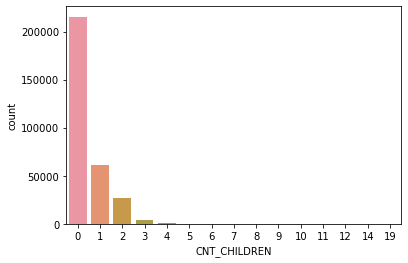

In [16]:
sns.countplot(x='CNT_CHILDREN', data=df)

### How is Target

<AxesSubplot:xlabel='TARGET', ylabel='count'>

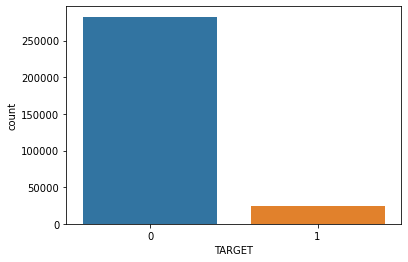

In [17]:
sns.countplot(x='TARGET', data=df)

### What gender who has difficulties from target

<AxesSubplot:xlabel='TARGET', ylabel='count'>

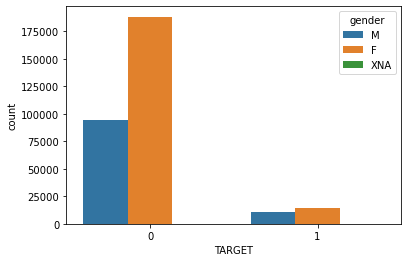

In [18]:
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df)
#place legend in upper right of plot
plt.legend(loc='upper right', title='gender')

### Do having children affecting the target

<AxesSubplot:xlabel='TARGET', ylabel='count'>

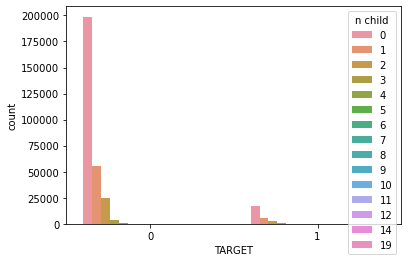

In [19]:
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=df)
#place legend in upper right of plot
plt.legend(loc='upper right', title='n child')

### How is the income type and how is it with target

<Figure size 936x504 with 0 Axes>

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

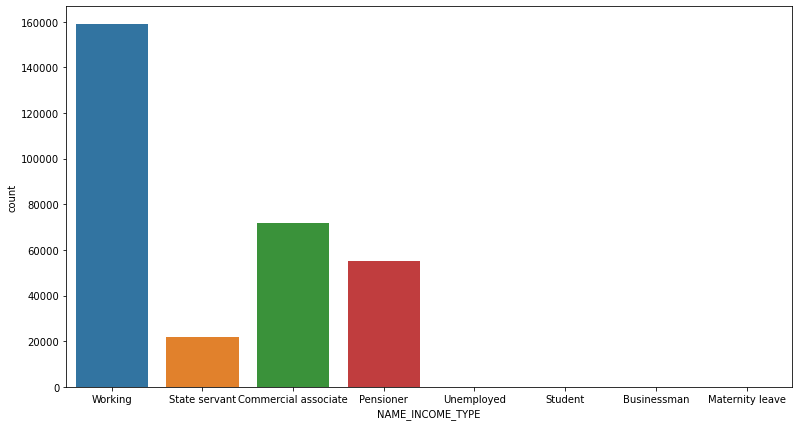

In [20]:
plt.figure(figsize=(13,7))
sns.countplot(x='NAME_INCOME_TYPE', data=df)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

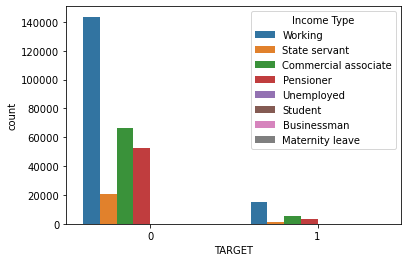

In [21]:
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=df)
#place legend in upper right of plot
plt.legend(loc='upper right', title='Income Type')

### How skew is AMT_INCOME_TOTAL

### Correlation numerical data

<Figure size 3600x3600 with 0 Axes>

<AxesSubplot:>

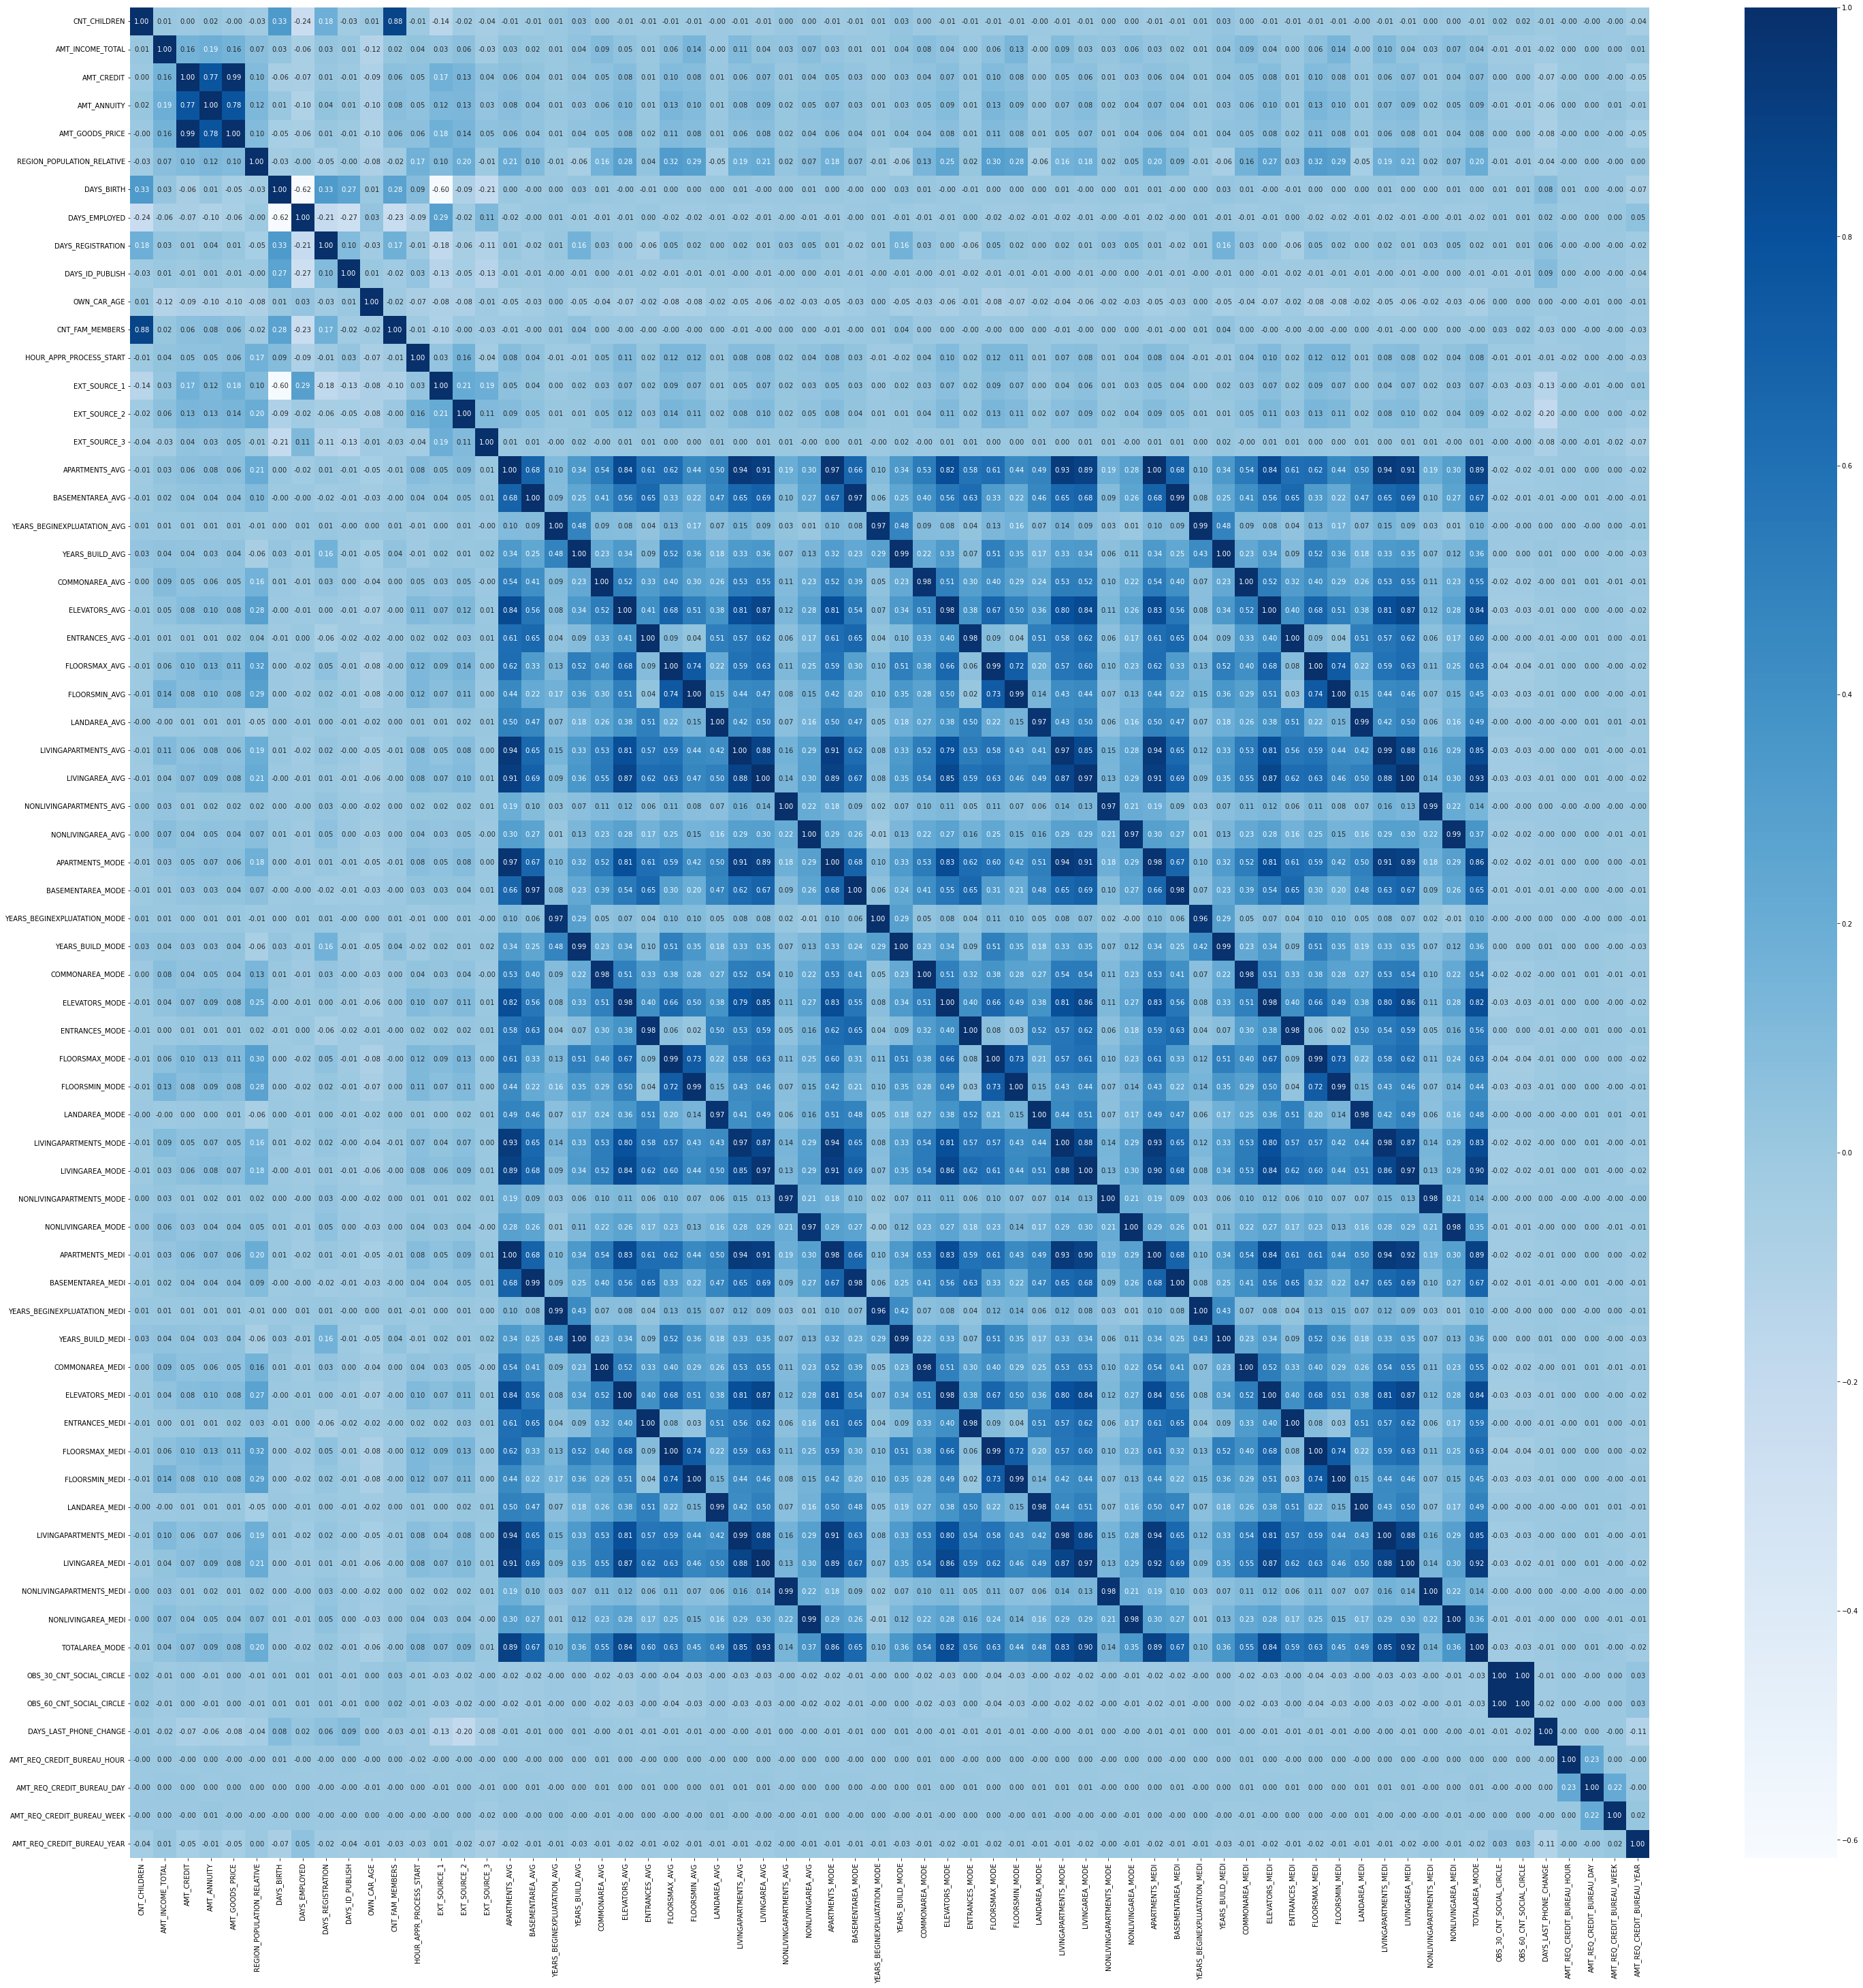

In [22]:
# correlation heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

* We also see some high correlation between AMT_GOODS_PRICE & AMT_CREDIT and DAYS_EMPLOYED & DAYS_BIRTH.
* Among all the features, we see the highest association of EXT_SOURCE features with respect to Target Variable. 
* These features could also prove to be important for the classification task.

# Data Cleansing

In [23]:
#Checking Dplicated data
df.duplicated().sum()

0

### Dropping missing value

In [24]:
df = df.dropna()

In [25]:
df.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

# Clearing Correlated Data

In [26]:
#import library to find correlation
from sklearn import datasets

In [27]:
#finding correlation in list type
cor_matrix = df.corr().abs()
print(cor_matrix)

                              CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000          0.023069    0.015191   
AMT_INCOME_TOTAL                  0.023069          1.000000    0.348575   
AMT_CREDIT                        0.015191          0.348575    1.000000   
AMT_ANNUITY                       0.020395          0.415807    0.751587   
AMT_GOODS_PRICE                   0.021157          0.354556    0.987994   
REGION_POPULATION_RELATIVE        0.025688          0.211133    0.110804   
DAYS_BIRTH                        0.175747          0.119206    0.198152   
DAYS_EMPLOYED                     0.014600          0.028260    0.068760   
DAYS_REGISTRATION                 0.141624          0.005067    0.024419   
DAYS_ID_PUBLISH                   0.124930          0.000738    0.010270   
OWN_CAR_AGE                       0.008337          0.120090    0.078948   
CNT_FAM_MEMBERS                   0.906702          0.029112    0.023574   
HOUR_APPR_PR

In [28]:
#looking top correlation
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                              CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                           NaN          0.023069    0.015191   
AMT_INCOME_TOTAL                       NaN               NaN    0.348575   
AMT_CREDIT                             NaN               NaN         NaN   
AMT_ANNUITY                            NaN               NaN         NaN   
AMT_GOODS_PRICE                        NaN               NaN         NaN   
REGION_POPULATION_RELATIVE             NaN               NaN         NaN   
DAYS_BIRTH                             NaN               NaN         NaN   
DAYS_EMPLOYED                          NaN               NaN         NaN   
DAYS_REGISTRATION                      NaN               NaN         NaN   
DAYS_ID_PUBLISH                        NaN               NaN         NaN   
OWN_CAR_AGE                            NaN               NaN         NaN   
CNT_FAM_MEMBERS                        NaN               NaN         NaN   
HOUR_APPR_PR

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_12572\3353425137.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [29]:
#Listing Columns that can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['AMT_GOODS_PRICE', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE']


In [30]:
#Changing boolean data type to object
#df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].astype(np.integer)
#df['APARTMENTS_MODE'] = df['APARTMENTS_MODE'].astype(np.integer)
#df['BASEMENTAREA_MODE'] = df['BASEMENTAREA_MODE'].astype(np.integer)
#df['YEARS_BUILD_MODE'] = df['YEARS_BUILD_MODE'].astype(np.integer)
#df['COMMONAREA_MODE'] = df['COMMONAREA_MODE'].astype(np.integer)
#df['ELEVATORS_MODE'] = df['ELEVATORS_MODE'].astype(np.integer)
#df['ENTRANCES_MODE'] = df['ENTRANCES_MODE'].astype(np.integer)
#df['FLOORSMAX_MODE'] = df['FLOORSMAX_MODE'].astype(np.integer)
#df['FLOORSMIN_MODE'] = df['FLOORSMIN_MODE'].astype(np.integer)
#df['LANDAREA_MODE'] = df['LANDAREA_MODE'].astype(np.integer)
#df['LIVINGAPARTMENTS_MODE'] = df['LIVINGAPARTMENTS_MODE'].astype(np.integer)
#df['LIVINGAREA_MODE'] = df['LIVINGAREA_MODE'].astype(np.integer)
#df['NONLIVINGAPARTMENTS_MODE'] = df['NONLIVINGAPARTMENTS_MODE'].astype(np.integer)
#df['APARTMENTS_MEDI'] = df['APARTMENTS_MEDI'].astype(np.integer)
#df['BASEMENTAREA_MEDI'] = df['BASEMENTAREA_MEDI'].astype(np.integer)
#df['YEARS_BUILD_MEDI'] = df['YEARS_BUILD_MEDI'].astype(np.integer)
#df['COMMONAREA_MEDI'] = df['COMMONAREA_MEDI'].astype(np.integer)
#df['ELEVATORS_MEDI'] = df['ELEVATORS_MEDI'].astype(np.integer)
#df['ENTRANCES_MEDI'] = df['ENTRANCES_MEDI'].astype(np.integer)
#df['FLOORSMAX_MEDI'] = df['FLOORSMAX_MEDI'].astype(np.integer)
#df['FLOORSMIN_MEDI'] = df['FLOORSMIN_MEDI'].astype(np.integer)
#df['LANDAREA_MEDI'] = df['LANDAREA_MEDI'].astype(np.integer)
#df['LIVINGAPARTMENTS_MEDI'] = df['LIVINGAPARTMENTS_MEDI'].astype(np.integer)
#df['LIVINGAREA_MEDI'] = df['LIVINGAREA_MEDI'].astype(np.integer)
#df['NONLIVINGAPARTMENTS_MEDI'] = df['NONLIVINGAPARTMENTS_MEDI'].astype(np.integer)
#df['NONLIVINGAREA_MEDI'] = df['NONLIVINGAREA_MEDI'].astype(np.integer)
#df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].astype(np.integer)

# Outliers Handling

#### Checking Skewness

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

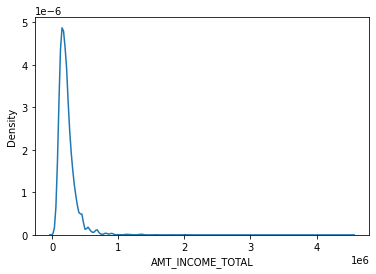

In [31]:
sns.kdeplot(df['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

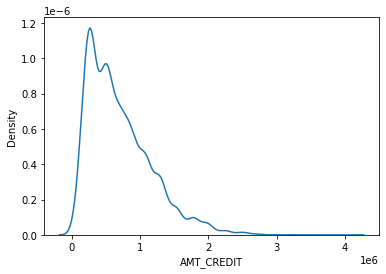

In [32]:
sns.kdeplot(df['AMT_CREDIT'])

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

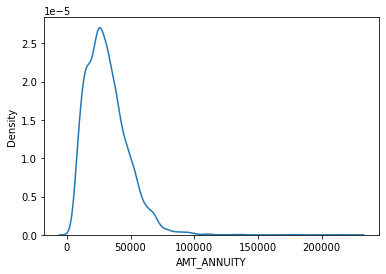

In [33]:
sns.kdeplot(df['AMT_ANNUITY'])

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

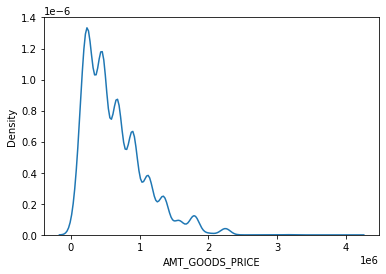

In [34]:
sns.kdeplot(df['AMT_GOODS_PRICE'])

<AxesSubplot:xlabel='BASEMENTAREA_AVG', ylabel='Density'>

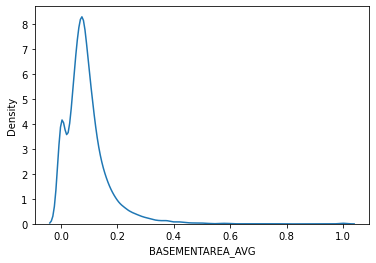

In [35]:
sns.kdeplot(df['BASEMENTAREA_AVG'])

#### Log Transformation

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

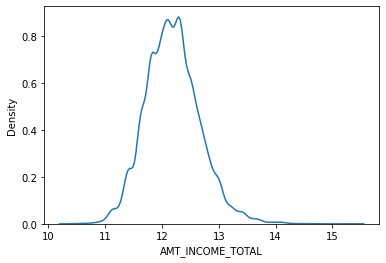

In [36]:
sns.kdeplot(np.log(df['AMT_INCOME_TOTAL']))

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

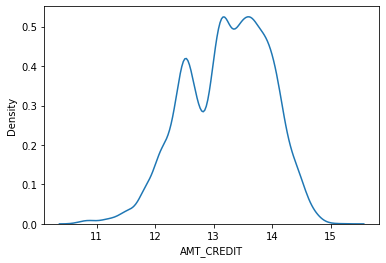

In [37]:
sns.kdeplot(np.log(df['AMT_CREDIT']))

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

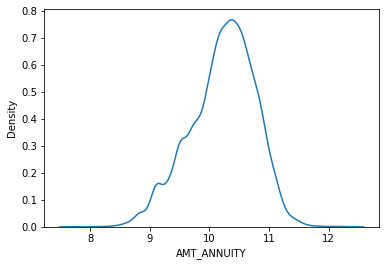

In [38]:
sns.kdeplot(np.log(df['AMT_ANNUITY']))

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

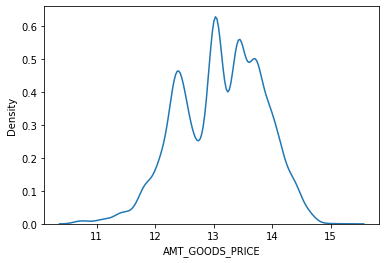

In [39]:
sns.kdeplot(np.log(df['AMT_GOODS_PRICE']))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='BASEMENTAREA_AVG', ylabel='Density'>

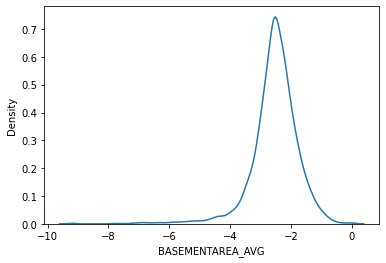

In [40]:
sns.kdeplot(np.log(df['BASEMENTAREA_AVG']))

In [41]:
from scipy import stats

In [42]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 8602
Jumlah baris setelah memfilter outlier: 6420


# Feature Encoding

#### label encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in df.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(df[col]) <= 2:
        df[col] = le.fit_transform(df[col].astype(str))

        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))    

Label encoded 38 columns.


#### One-hot encoding

In [44]:
# One hot encoder pekerjaan dan sampo
# WARNING: run code ini sekali saja
for cat in ['WALLSMATERIAL_MODE',
            'HOUSETYPE_MODE', 
            'FONDKAPREMONT_MODE',
            'ORGANIZATION_TYPE',
            'WEEKDAY_APPR_PROCESS_START',
            'OCCUPATION_TYPE', 
            'NAME_HOUSING_TYPE',
            'NAME_FAMILY_STATUS', 
            'NAME_EDUCATION_TYPE', 
            'NAME_INCOME_TYPE', 
            'NAME_TYPE_SUITE']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

# Machine Learning

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X= df.select_dtypes(include=[np.number])
y = df['TARGET']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

#### Training the Model

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_train,y_train)
#Equation coefficient and Intercept
print('Coefficient: \n',logreg.coef_)
predicted = logreg.predict(X_test)

LogisticRegression()

0.9411764705882353

Coefficient: 
 [[ 6.23845673e-07 -2.97864411e-08  3.03473542e-08  0.00000000e+00
  -3.42713757e-08 -6.98658959e-08 -3.56471026e-06  3.61002602e-06
  -1.75373266e-06 -3.91662702e-06 -8.02681619e-10  9.07817199e-05
   1.48227050e-04  5.67949181e-05  9.85483546e-05 -2.11858063e-07
   0.00000000e+00 -4.46950160e-08  9.16671817e-09 -4.59734033e-08
  -1.01158040e-08  6.74826035e-09 -1.38252345e-07 -7.10855709e-07
  -4.66724349e-09  2.89517343e-09  9.81983747e-09 -9.20538412e-09
  -2.31314205e-08 -2.16200997e-08 -5.48211197e-08 -6.71231020e-08
  -8.89208677e-08 -8.45651569e-09 -5.09458122e-09 -4.45544691e-08
  -4.06995559e-08 -2.27009253e-09 -5.70162736e-09 -8.38607442e-09
  -1.71397856e-08 -1.83671141e-08 -4.51704042e-09 -5.49097663e-09
  -8.89022820e-09 -1.79718012e-10 -1.82165334e-09 -6.92755753e-09
  -3.84806208e-09 -4.45082140e-08 -4.07971241e-08 -2.37037659e-09
  -5.28547186e-09 -6.93917668e-09 -1.62088464e-08 -1.79958600e-08
  -3.88512128e-09 -5.31272237e-09 -7.73806520e-09 -9.64033709

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1972
           1       0.00      0.00      0.00       147

    accuracy                           0.93      2119
   macro avg       0.47      0.50      0.48      2119
weighted avg       0.87      0.93      0.90      2119



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
con = confusion_matrix(y_true=y_test, y_pred=predicted)

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Logistic Regression')

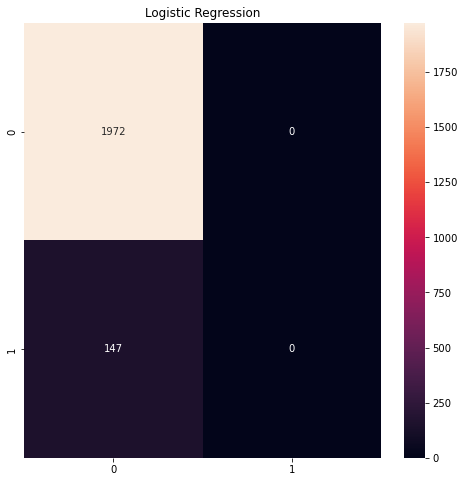

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(con, annot=True, fmt="g")
plt.title("Logistic Regression")
plt.show()

# Decision Tree

In [51]:
X= df.select_dtypes(include=[np.number])
y = df['TARGET']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [52]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_train,y_train)
predicted = model.predict(X_test)

DecisionTreeRegressor()

1.0

In [53]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      1.00      1.00       147

    accuracy                           1.00      2119
   macro avg       1.00      1.00      1.00      2119
weighted avg       1.00      1.00      1.00      2119



<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Decicion Tree')

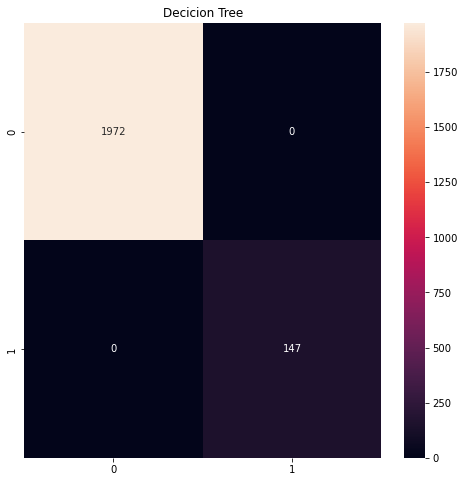

In [62]:
con = confusion_matrix(y_true=y_test, y_pred=predicted)
plt.figure(figsize=(8,8))
sns.heatmap(con, annot=True, fmt="g")
plt.title("Decicion Tree")
plt.show()

# ROC AUC

In [59]:
from sklearn.metrics import roc_auc_score
